In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def show(img):
    if img.ndim==2:
        plt.imshow(img,cmap="gray")
    elif img.ndim==3:
        img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1.卷积

In [3]:
img=np.ones((5,5))
kernel = np.ones((3,3))
print(img)
print(kernel)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [4]:
img2 = cv.filter2D(img,-1,kernel)#第二个参数ddepth写-1即代表数据类型不变
print(img2)#边缘进行了填充，使得其与原来的尺寸相同

[[9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9.]]


## 2.均值滤波和中值滤波

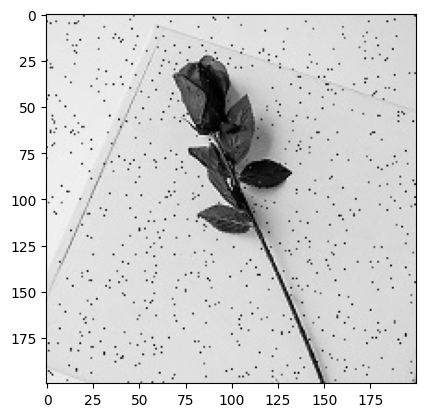

In [6]:
img = cv.imread("pic/rose_spnoise_200x200.jpg")
show(img)

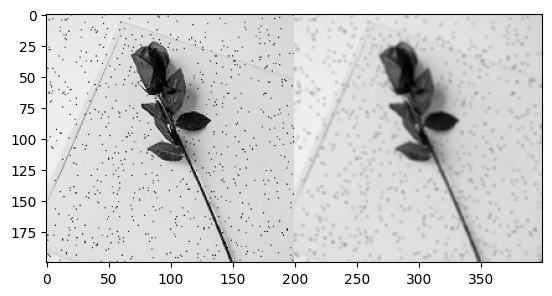

In [7]:
#自己实现
kernel = np.ones((3,3))/9
img1 = cv.filter2D(img,-1,kernel)
show(np.hstack([img,img1]))

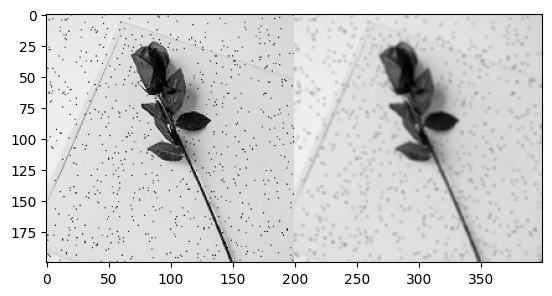

In [8]:
#官方接口
img2 = cv.blur(img,(3,3))#第二个参数为卷积核大小
show(np.hstack([img,img2]))

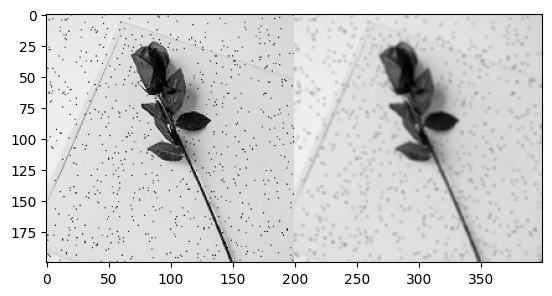

In [9]:
img3 = cv.boxFilter(img,-1,(3,3))
show(np.hstack([img,img3]))

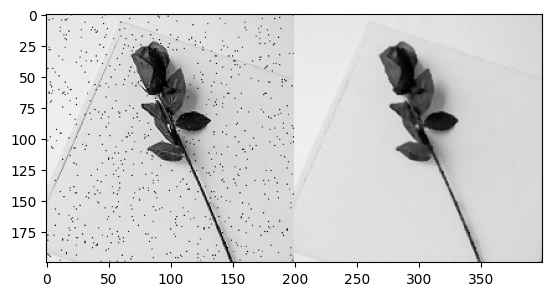

In [10]:
#中值模糊
img4 = cv.medianBlur(img,3)
show(np.hstack([img,img4]))

## 4.高斯滤波

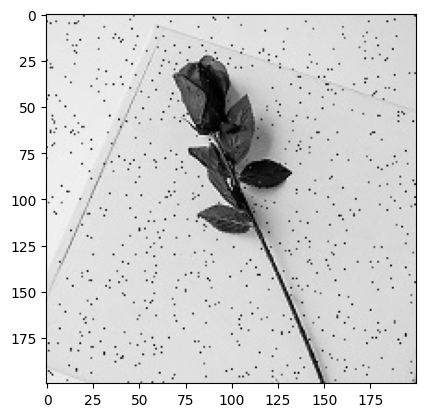

In [11]:
img = cv.imread("pic/rose_spnoise_200x200.jpg")
show(img)

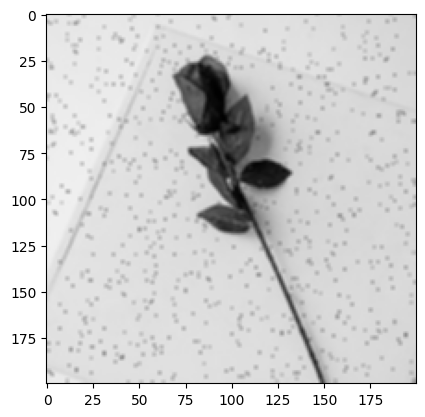

In [15]:
sigma=1.0#方差  方差太小，比如0.01,那么没有滤波效果；方差太大，比如100，那么和均值滤波效果类似
img2 = cv.GaussianBlur(img,(3,3),sigmaX=sigma)
show(img2)

## 5.双边滤波

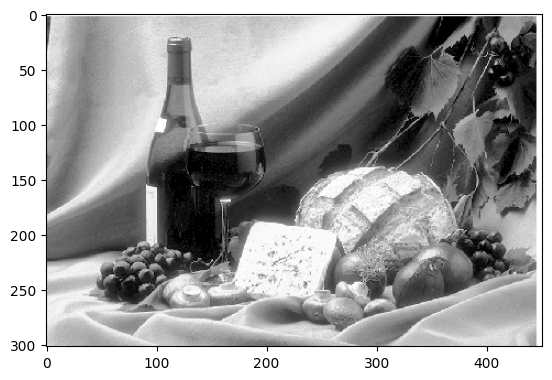

In [16]:
img = cv.imread("pic/beer.jpg",0)
show(img)

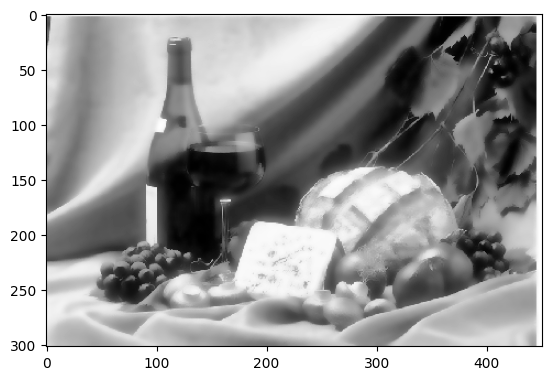

In [17]:
img2 = cv.bilateralFilter(img,-1,sigmaColor=50,sigmaSpace=3)#sigmaColor颜色方差 sigmaSpace空间方差
show(img2)

## 6.双边滤波diy实现

$$
c(\xi - x) = e^{-0.5(\frac{\lVert \xi-x \rVert}{\sigma_d})^2}
$$

In [20]:
def get_C(sigmad, n):
    C = np.zeros((n,n))
    
    # 0, 1, 2
    x = np.array([n//2, n//2])
    for i in range(n):
        for j in range(n):
            ksi = np.array([i, j])
            C[i,j] = np.exp(-0.5 * (np.linalg.norm(ksi - x) / sigmad)**2)
            
    C /= C.sum()
    return C
    

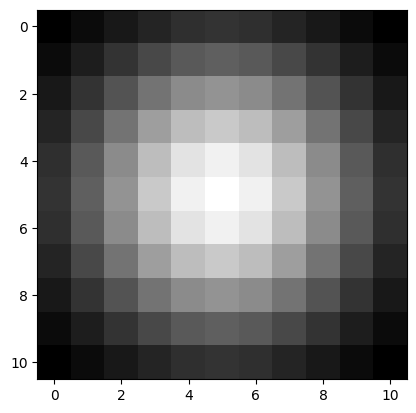

In [22]:
C = get_C(3,11)
show(C)

$$
s(f(\xi)- f(x)) = e^{-0.5(\frac{\lVert f(\xi)-f(x) \rVert}{\sigma_r})^2}
$$

In [23]:
%%time
def get_S(f, sigmar, n):
    S = np.zeros((n,n))
    
    f = np.float64(f)
    for i in range(n):
        for j in range(n):
            S[i,j] = np.exp(-0.5 * ((f[i,j] - f[n//2, n//2]) / sigmar)**2)
            
    S /= S.sum()
    return S

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 12.2 µs
